<a href="https://colab.research.google.com/github/ddinesan/Manga/blob/master/Lecture_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Create Superposition of Qubits Using Cirq

This is a worksheet prepared by Samantha Buck, Julien Roth and Kelly Zheng for Lecture 8 of the reading course "Introduction to Quantum Computer Programming" (AMATH 900/ AMATH 495/ QIC 895) at the University of Waterloo.

Course Webpage: https://sites.google.com/view/quantum-computer-programming

Text followed in the course: [Quantum Computing, An Applied Approach](https://www.springer.com/gp/book/9783030239213) by Jack D. Hidary (2019)


In [ ]:
!pip install cirq qutip

     |████████████████████████████████| 1.2MB 2.8MB/s 
     |████████████████████████████████| 3.8MB 21.1MB/s 
     |████████████████████████████████| 1.8MB 27.7MB/s 
     |████████████████████████████████| 1.2MB 42.8MB/s 
     |████████████████████████████████| 5.3MB 39.7MB/s 
  Created wheel for qutip: filename=qutip-4.4.1-cp36-cp36m-linux_x86_64.whl size=13219071 sha256=6dc84c84ab28c92e3c79b6ff1f754110e7a24d3269924a0743fa69bcc2b989ae
  Stored in directory: /root/.cache/pip/wheels/3b/23/d5/612753c4a08bf617138f3ed26e57933dc606b3f0f4e9cc60b8
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=dc4188b6982db0684c6f87ffbf4447d8141767876c04a13ab484aeb13c4185a4
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built qutip networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: net

In [ ]:
import random 
import cirq
import qutip
import numpy as np
from cirq.circuits import InsertStrategy

from cirq.contrib.svg import circuit_to_svg
from IPython.display import SVG, display
import os


In [ ]:
#Defining a function to print/output circuits in a clean way. This was shown to us by Nadine in lecture one 
def cprint(circuit):
  """Convert the cirq.Circuit to a temp svg and display + garbage collect."""
  with open("temp.svg", 'w+') as f:
    f.write(circuit_to_svg(circuit))
  display(SVG('temp.svg'))
  os.remove('temp.svg')

# How to Create Entanglement of Qubits Using Cirq

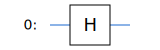

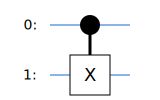

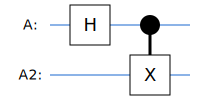

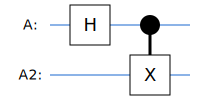

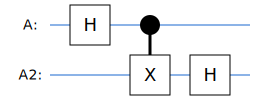

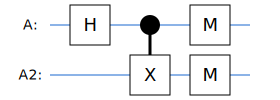

In [ ]:
#generate the qubits you want to entangle. Here there are two, you can define more if you wish 
q0, q1 = cirq.LineQubit.range(2)

#how to apply the H gate to a qubit 
hadamardgate = cirq.H(q0)
cprint(cirq.Circuit(hadamardgate))

#how to apply a CNOT gate to your qubits
controllednot = cirq.CNOT(q0,q1)
cprint(cirq.Circuit(controllednot))

#out them together to generate the entanglement of qubits 1 and 2
q0 = cirq.NamedQubit("A")
q1 = cirq.NamedQubit("A2")
#q2 = cirq.NamedQubit("B")
ops = [cirq.H(q0), cirq.CNOT(q0, q1)]
circuit = cirq.Circuit(*ops)
cprint(circuit)

# Remember by using Circuit's constructor as the tool to construct out circuit, which we have here, cirq takes a list of Moments. Each Moment must be explicitly constructed with its own list of Operations. 
#This gives complete control over how the operations are layed out

#HOWEVER, there are altenrate methods to generating a ciruit, such as the "append" and instert" functions, which would look like the following for our above example:

#Using Append:

circuit = cirq.Circuit()
circuit.append([cirq.H(q0), cirq.CNOT(q0, q1)])
cprint(circuit)

#Using Insert:

circuit.insert(2, cirq.H(q1))
cprint(circuit)


#can also measure our ciruit 
#measure:

m = [cirq.H(q0), cirq.CNOT(q0, q1), cirq.measure(q0),cirq.measure(q1)]
cprint(cirq.Circuit(*m))
    

In [ ]:
#Remember, there are also methods of represting these cirits that can be used such as a text diagram, which we would define for the example above as :
for i, moment in enumerate(circuit):
    print('Moment {}: {}'.format(i, moment))
    
# if we were to elect this manner of representatin and wanted to inspect the internal structure of the circiit , we can simple ask cirq to deconstruct this for us by the following command:
print(repr(circuit))

Moment 0: H(A)
Moment 1: CNOT(A, A2)
Moment 2: H(A2)
cirq.Circuit([
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('A')),
    ]),
    cirq.Moment(operations=[
        cirq.CNOT.on(cirq.NamedQubit('A'), cirq.NamedQubit('A2')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('A2')),
    ]),
])


In [ ]:
#Remember, there are two ways to apply a gate onto qubits. 
#First, we can apply the Hadamard gate H onto a qubit a using the on method: cirq.H.on(a) 
#Alternatively we can achieve this by calling the gate directly on the qubit (as if the gate was a function and the qubits were arguments): cirq.H(a)

In [ ]:
#Remember, for each of these gates, calling cirq.unitary on the gate will tell you how it acts on the computational basis.

print('CNOT =')
print(cirq.unitary(cirq.CNOT))
print('\nH =')
print(cirq.unitary(cirq.H))

CNOT =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]

H =
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


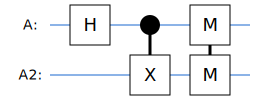


Measurement results:  A,A2=1, 1


In [ ]:
# to verify that entagnlement was generated between the qubits, let us re-prent the circuit and then apply a bell measurement and see if we get the expected outcome:
#Remember in Cirq, simulators make a distinction between a “run” and a “simulation”
#Remember, after creating the circuit and a simulator, we can "run" a simulation of the circuit and thereby simulate an actual measurement outcome. If we don't simulate the circuit we will be using "run", which will mimics the actual quantum hardware

# Define our two qubits and some operations (the entanglement operation in this case, and H gate and a CNOT gate)
q0 = cirq.NamedQubit("A")
q1 = cirq.NamedQubit("A2")
#q2 = cirq.NamedQubit("B")


# Define our entangelement circuit
ops = [cirq.H(q0), cirq.CNOT(q0, q1), cirq.measure(q0,q1)]
circuit = cirq.Circuit(*ops)
cprint(circuit)


# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
result = simulator.run(circuit)
print('\nMeasurement results: ',result)



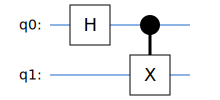


Wavefunction:
[ 0.707+0.j  0.   +0.j -0.   +0.j  0.707+0.j]

Dirac notation:
0.71|00⟩ + 0.71|11⟩


In [ ]:
#Notice: Employing the "run" method of simulating our circuit (used above) mimics the actual hardware and therefore it doesn't give us access to unphysical objects like the wavefunction. If we want to know what the wave function looks like, we use the simulate methods:
q0 = cirq.NamedQubit("q0")
q1 = cirq.NamedQubit("q1")
ops = [cirq.H(q0), cirq.CNOT(q0,q1)]

# Define a basic Circuit
circuit = cirq.Circuit(*ops)
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Simulate the circuit
result = simulator.simulate(circuit)

print('\nWavefunction:')
print(np.around(result.final_state, 3))
print('\nDirac notation:')
print(result.dirac_notation())


# How to Create a Bell Inequality Test Using Cirq

In [ ]:
#Julien 

import cirq
import math
import numpy as np
import matplotlib
import array as arr
from cirq.circuits import InsertStrategy

#Creating the different gates used in the circuit the spin
class Bob1(cirq.SingleQubitGate):
    
    def _unitary_(self):
        return np.array([[-1/math.sqrt(2),-1/math.sqrt(2)], [-1/math.sqrt(2), 1/math.sqrt(2)]])
    
    def __str__(self):
        return 'S'

class Bob2(cirq.SingleQubitGate):
    
    def _unitary_(self):
        return np.array([[1/math.sqrt(2),-1/math.sqrt(2)], [-1/math.sqrt(2), -1/math.sqrt(2)]])
    
    def __str__(self):
        return 'T'

#Gates used to switch from computational basis to the eigenbasis of the differents spinors

class TM(cirq.SingleQubitGate):
    
    def _unitary_(self):
        return np.array([[math.cos(math.pi*0.375),math.sin(math.pi*0.375)], [math.sin(math.pi*0.375), -math.cos(math.pi*0.375)]])
    
    def __str__(self):
        return 'TM'

class SM(cirq.SingleQubitGate):
    
    def _unitary_(self):
        return np.array([[math.cos(math.pi*0.625),math.sin(math.pi*0.625)], [math.sin(math.pi*0.625), -math.cos(math.pi*0.625)]])
    
    def __str__(self):
        return 'SM'

class RM(cirq.SingleQubitGate):
    
    def _unitary_(self):
        return np.array([[math.cos(math.pi*0.25),math.sin(math.pi*0.25)], [math.sin(math.pi*0.25), -math.cos(math.pi*0.25)]])
    
    def __str__(self):
        return 'RM'

#Creating the differents circuits for the different settings

q0, q1 = cirq.LineQubit.range(2)

Bob1 = Bob1()

Bob2 = Bob2()

SM = SM()
TM = TM()
RM = RM()

ops1 = [cirq.H(q0), cirq.CNOT(q0,q1), cirq.X(q0), cirq.Z(q0),cirq.Z(q0),Bob1(q1),cirq.measure(q0, key ='Q1'),SM(q1),cirq.measure(q1, key='S1')]
ops2 = [cirq.H(q0), cirq.CNOT(q0,q1), cirq.X(q0), cirq.Z(q0),cirq.X(q0),Bob1(q1),RM(q0),cirq.measure(q0, key ='R1'),SM(q1),cirq.measure(q1, key='S2')]
ops3 = [cirq.H(q0), cirq.CNOT(q0,q1), cirq.X(q0), cirq.Z(q0),cirq.Z(q0),Bob2(q1),cirq.measure(q0, key ='Q2'),TM(q1),cirq.measure(q1, key='T1')]
ops4 = [cirq.H(q0), cirq.CNOT(q0,q1), cirq.X(q0), cirq.Z(q0),cirq.X(q0),Bob2(q1),RM(q0),cirq.measure(q0, key ='R2'),TM(q1),cirq.measure(q1, key='T2')]


circuit1 = cirq.Circuit(*ops1, strategy=InsertStrategy.NEW)
circuit2 = cirq.Circuit(*ops2, strategy=InsertStrategy.NEW)
circuit3 = cirq.Circuit(*ops3, strategy=InsertStrategy.NEW)
circuit4 = cirq.Circuit(*ops4, strategy=InsertStrategy.NEW)

# Defining the simulator and collecting the datas from the different experiments
simulator = cirq.Simulator()

result1 = simulator.run(circuit1, repetitions= 1000)
Q1 = np.array(result1.measurements['Q1'][:, 0],'i')
S1 = np.array(result1.measurements['S1'][:, 0],'i')

result2 = simulator.run(circuit2, repetitions= 1000)
R1 = np.array(result2.measurements['R1'][:, 0],'i')
S2 = np.array(result2.measurements['S2'][:, 0],'i')

result3 = simulator.run(circuit3, repetitions= 1000)
Q2 = np.array(result3.measurements['Q2'][:, 0],'i')
T1 = np.array(result3.measurements['T1'][:, 0],'i')

result4 = simulator.run(circuit4, repetitions= 1000)
R2 = np.array(result4.measurements['R2'][:, 0],'i')
T2 = np.array(result4.measurements['T2'][:, 0],'i')

# Converting the measurments 0 into -1 as it is needed in the protocol
for i in range(len(Q1)):
  if Q1[i] == 0:
    Q1[i] = -1
  if Q2[i] == 0:
    Q2[i] = -1
  if S1[i] == 0:
    S1[i] = -1
  if S2[i] == 0:
    S2[i] = -1
  if R1[i] == 0:
    R1[i] = -1
  if R2[i] == 0:
    R2[i] = -1
  if T1[i] == 0:
    T1[i] = -1
  if T2[i] == 0:
    T2[i] = -1

#Calculating and printing out the correlators

print('<QS> = ', np.vdot(Q1,S1)/1000)
print('<RS> = ', np.vdot(R1,S2)/1000)
print('<QT> = ', np.vdot(Q2,T1)/1000)
print('<RT> = ', np.vdot(R2,T2)/1000)

<QS> =  0.69
<RS> =  0.73
<QT> =  0.68
<RT> =  -0.708


# How to Demonstrate Quantum Teleportation Using Cirq

In [ ]:
#First, let us define a function that returns a quantum teleportation circuit

def make_quantum_teleportation_circuit(ranX, ranY):
    
    
# Step 1: We need to create three qubits; A1 to be teleported, A2 to represent Alice's qubit, B is Bob's qubit that will be entangled with A2:
    A1, A2, B = cirq.LineQubit.range(3)

# Step 2: Now we need to create a circuit that will put Alice's first qubit, A1, into a random (i.e unknown to Alice) state:
    circuit = cirq.Circuit()
    circuit.append([cirq.X(A1)**ranX, cirq.Y(A1)**ranY])

# Step 3: We can verify the state in which we prepared Alice's qubit A1, simulate circuit and store result in "message"
    simulator = cirq.Simulator()
    message = simulator.simulate(circuit)
    
# Step 4: Now we are ready to create the Bell state between Alice's second qubit A2 and Bob's qubit B:
    circuit.append([cirq.H(A2), cirq.CNOT(A2,B)])
    
# Step 5: Now we teleport the state of A1 via the entanglement between A2 and B by making Alice perform a Bell measurement on her two qubits A1 and A2 
    circuit.append([cirq.CNOT(A1,A2), cirq.H(A1), cirq.measure(A1,A2)])
    
# Step 6: After Alice's measurement, A1 and A2  will represent two classical bits, q and a. Bob will use these classical bits to perform the operations (Z^q)(X^a) on his entangled qubit B
    circuit.append([cirq.CNOT(A2,B), cirq.CZ(A1,B)])

    return message, circuit

Bloch vector of Alice's first qubit A1:   a = [qx, qy, qz] =  [-0.0195, -0.8616,  0.5072] 



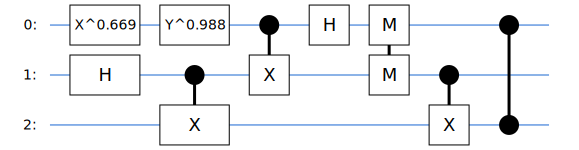


Final Bloch vector of B:   b = [bx, by, bz] =  [-0.0195, -0.8616,  0.5072] 

The state of Alices first qubit A1 was successfully teleported from Alice to Bob.


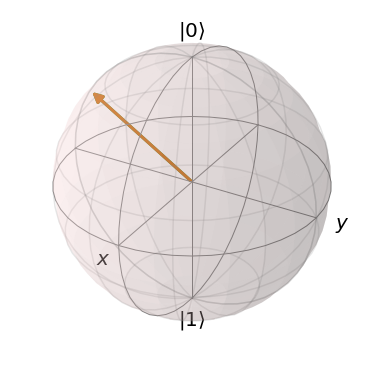

In [ ]:
#Now let us create two random numbers and use them as input for our make_quantum_teleportation_circuit function. 

# Create two random numbers between 0 and 1
ranX = random.random()
ranY = random.random()

# Create the teleportation circuit
quantummessage, circuit = make_quantum_teleportation_circuit(ranX, ranY)
    
a = np.round_(cirq.bloch_vector_from_state_vector(quantummessage.final_state, 0),4)
print("Bloch vector of Alice's first qubit A1:  ", "a = [qx, qy, qz] = ", np.array2string(a,separator=', '), '\n')
BSphere = qutip.Bloch()
BSphere.add_vectors(a)

cprint(circuit)
    
simulator = cirq.Simulator()
receivedmessage = simulator.simulate(circuit)

b = np.round_(cirq.bloch_vector_from_state_vector(receivedmessage.final_state, 2),4)
print("\nFinal Bloch vector of B:  ","b = [bx, by, bz] = ", np.array2string(b,separator=', '), '\n')
BSphere.add_vectors(b)
BSphere.show()

if (a==b).any(): 
  print('The state of Alices first qubit A1 was successfully teleported from Alice to Bob.')
else:
  print('The teleportation of qubit A1 to Bob failed.')

# A Second Example of a Teleportation Circuit Using Cirq

message is 0 of type <class 'cirq.devices.line_qubit.LineQubit'>


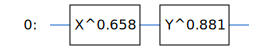

x:  -0.173 y:  -0.8797 z:  0.4429


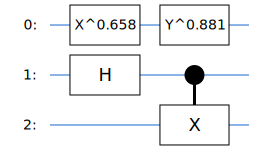

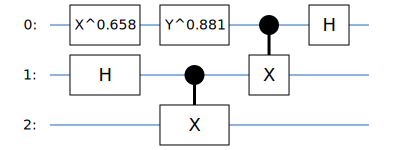

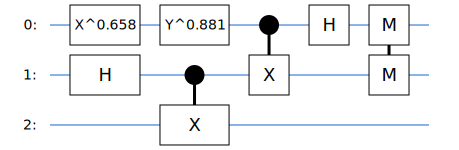

x:  -0.173 y:  -0.8797 z:  0.4429


In [ ]:
#Creating Alice’s message (which will be teleported) by first creating our first qubit (object):

import cirq
quantmsg = cirq.LineQubit(0)
print('message is {0} of type {1}'.format(quantmsg, type(quantmsg)))

# Now we want to fill this object with a random qubit value, by applying an X gate and a Y gate to it, and multiplying by a random float number:'='

import random
ranX = random.random()
ranY = random.random()
ranq = cirq.X(quantmsg)**ranX, cirq.Y(quantmsg)**ranY

#Now we can create a circuit and add Alice's first qubit (the message) to it. NOTICE how we have chosen to create our circuit using the append feature of cirq:

circuit = cirq.Circuit()
circuit.append(ranq)
cprint(circuit)

#The variable below, "original_message", holds Alice's message, which will be compared to the teleported message Bob recovers in the end. This will allow us to verify if teleportation was successful:

import numpy as np
sim = cirq.Simulator()
original_message = sim.simulate(circuit)
expected = cirq.bloch_vector_from_state_vector(original_message.final_state, 0)
print("x: ", np.around(expected[0], 4), "y: ", np.around(expected[1], 4), "z: ", np.around(expected[2], 4))

# print("Bloch vector of Alice's first qubit 'quantmsg':  ", "quantmsg = [qx, qy, qz] = ", np.array2string(expected,separator=', '), '\n')
# BSphere = qutip.Bloch()
# BSphere.add_vectors(expected)



#Creating the entangled state between Alice's second qubit and Bob's qubit that will teleport Alice’s original message:

alice, bob = cirq.LineQubit.range(1, 3)
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])
cprint(circuit)

#Entangling Alice’s original message into Alice's second qubit (labelled alice) that comprises half of the bell pair of qubits that Bob and Alice share:

circuit.append([cirq.CNOT(quantmsg, alice), cirq.H(quantmsg)])
cprint(circuit)

#Alice processes her message by measuring her two qubits (labelled quantmsg and alice, respectively):

circuit.append(cirq.measure(quantmsg, alice))
cprint(circuit)


#Bob measures his qubit and confirms whether the state from Alice's original message was teleported successfully:

circuit.append([cirq.CNOT(alice, bob), cirq.CZ(quantmsg, bob)])
final_results = sim.simulate(circuit)
teleported = cirq.bloch_vector_from_state_vector(final_results.final_state, 2)
print("x: ", np.around(teleported[0], 4), "y: ", np.around(teleported[1], 4), "z: ", np.around(teleported[2], 4))


# print("\nFinal Bloch vector of Bob's qubit B:  ","B = [bx, by, bz] = ", np.array2string(teleported,separator=', '), '\n')
# BSphere.add_vectors(teleported)
# BSphere.show()


#notice that we get the same result as the original message that was encoded into Alice's qubit, therefore the teleportation was indeed successful 


# Example of Entanglement Using IBM Qiskit (can run on actual hardware, this will show how noise will yield non 50/50 outcome for bell state preparation)